# K-Nearest Neighbors
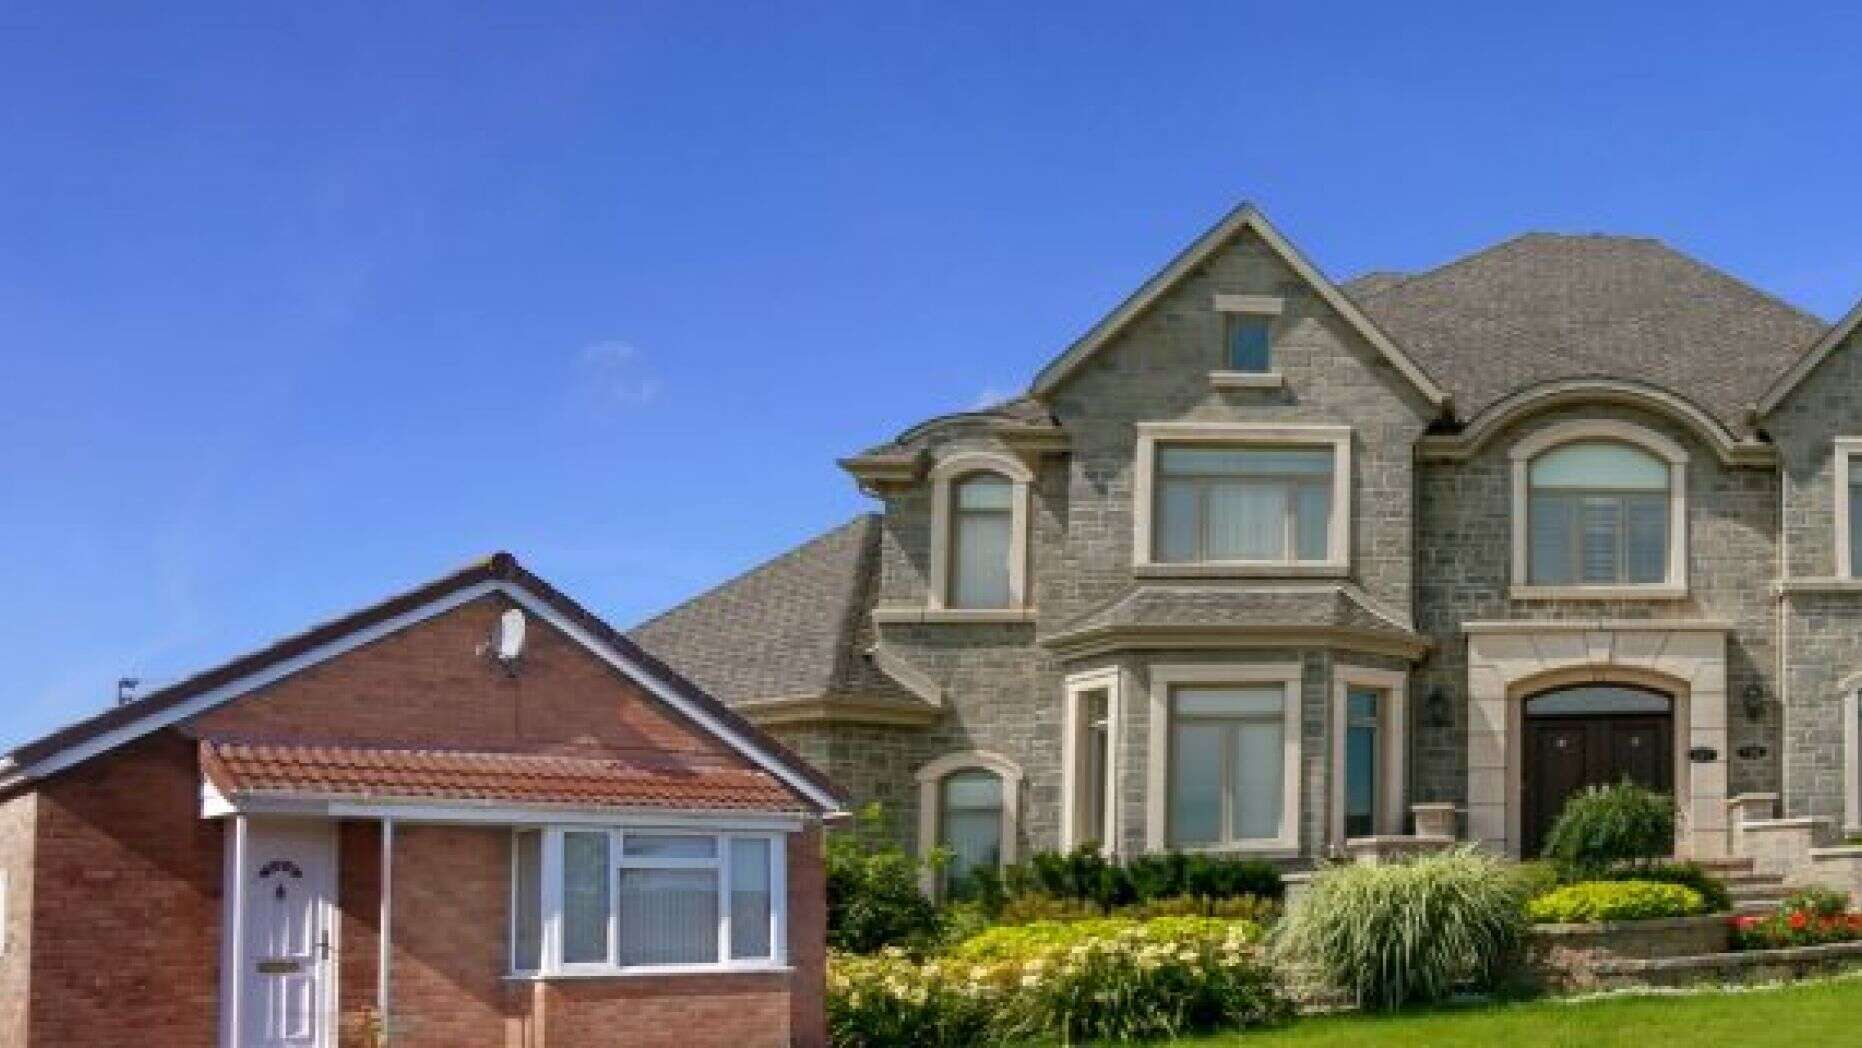

# Setup

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import cross_val_score

import ipywidgets as widgets

# Data

In [40]:
points, assign = make_blobs(n_samples=300, 
           n_features=2, 
           centers=[(2,2), (3,3), (4,1)],
           shuffle=True, 
           random_state=26)

In [41]:
df = pd.DataFrame(points)
df = df.rename(columns={0:'posX', 1:'posY'})
df['label'] = assign
df.head()

,posX,posY,label
0,4.468770,0.013032,2
1,2.079386,0.447349,0
2,5.245041,3.764350,1
3,4.479818,0.943798,2
4,2.122767,4.004583,1


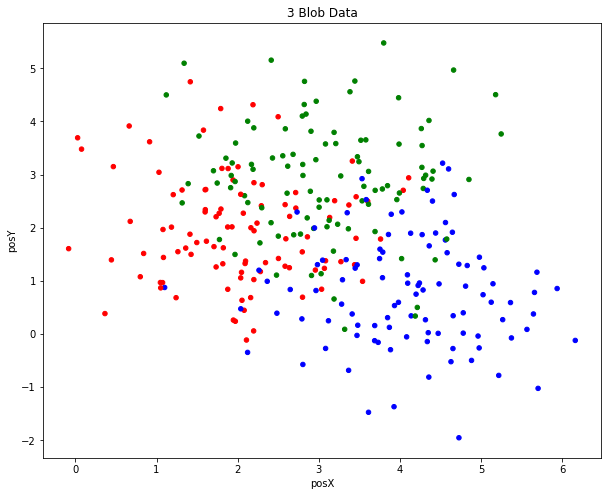

In [84]:
color = {0:'red', 1:'green', 2:'blue'}
c = df['label'].map(color)
df.plot.scatter(x='posX', y='posY', color=c, figsize=(10, 8), title='3 Blob Data')

# Plotting Routine

In [116]:
def fitAndPlot(df=df, title=None, neighbors=3, weights='uniform', algorithm='auto'):
    mesh = 0.05
    mapBoundary = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    mapPoints   = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    cols = ['posX', 'posY']
    clf = KNeighborsClassifier(neighbors)
    clf.fit(df[cols], df.label)
    
    Xmin, Xmax = df.posX.min() - 1, df.posX.max() + 1
    Ymin, Ymax = df.posY.min() - 1, df.posY.max() + 1
    xx, yy = np.meshgrid(np.arange(Xmin, Xmax, mesh), np.arange(Ymin, Ymax, mesh))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10,8))
    plt.pcolormesh(xx, yy, Z, cmap=mapBoundary)
    plt.scatter(df.posX, df.posY, c=df.label, edgecolor='k', s=20, cmap=mapPoints)
    if title is None:
        title = 'KNN (k = {}), Weight: {}'.format(neighbors, weights)
    plt.title(title)
    plt.show()

# Neighbors & Boundary
* As we increase k, our boundaries become smoother
* Overfitting / underfitting influenced by choice of k

In [97]:
from ipywidgets import interactive 
def event(neighbors):
    fitAndPlot(df, neighbors=neighbors)
w = interactive(event, neighbors=10)
display(w)

interactive(children=(IntSlider(value=10, description='neighbors', max=30, min=-10), Output()), _dom_classes=(…

# Optimal K Neighbors
* Crossfold validation (5 fold)
* Plot scores, select argmax

Text(0, 0.5, 'Accuracy')

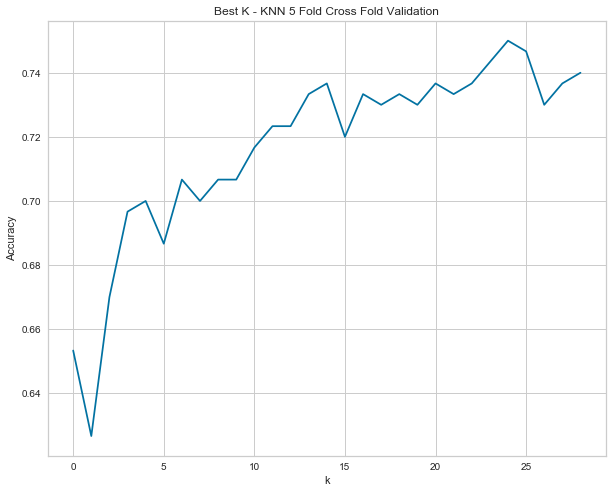

In [110]:
k_range  = range(1, 30)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, df[cols], df.label, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

plt.figure(figsize=(10,8))
plt.plot(k_scores)
plt.title('Best K - KNN 5 Fold Cross Fold Validation')
plt.xlabel('k')
plt.ylabel('Accuracy')

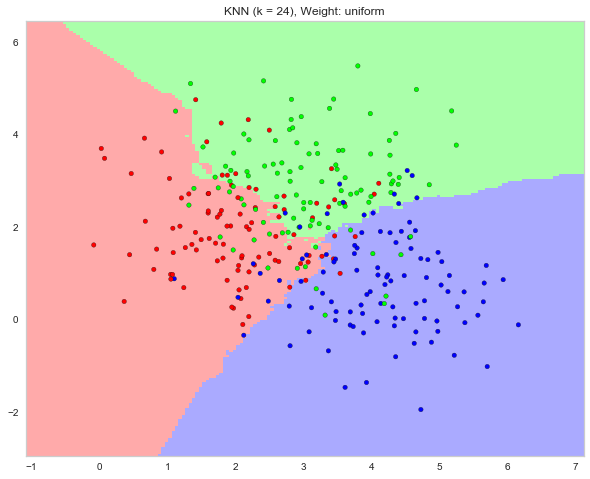

In [114]:
maxK = np.argmax(k_scores)
fitAndPlot(neighbors=maxK)

In [122]:
cvDF = pd.DataFrame(k_scores).reset_index(drop=False)
cvDF.rename(columns={'index':'k', 0:'CFV-Accuracy'})

,k,CFV-Accuracy
0,0,0.653333
1,1,0.626667
2,2,0.670000
3,3,0.696667
4,4,0.700000
5,5,0.686667
6,6,0.706667
7,7,0.700000
8,8,0.706667
9,9,0.706667


# Radius Neighbors
* An alternative to K nearest, we can look at a radius and use majority vote
* If no neighbors are found raises a ValueError or labels as outlier

In [152]:
def fitAndPlotRadius(df=df, title=None, radius=1.0, weights='uniform', algorithm='auto'):
    mesh = 0.2
    mapBoundary = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#808080'])
    mapPoints   = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#000000'])

    cols = ['posX', 'posY']
    clf = RadiusNeighborsClassifier(radius, outlier_label=3)
    clf.fit(df[cols], df.label)
    
    Xmin, Xmax = df.posX.min() - 1, df.posX.max() + 1
    Ymin, Ymax = df.posY.min() - 1, df.posY.max() + 1
    xx, yy = np.meshgrid(np.arange(Xmin, Xmax, mesh), np.arange(Ymin, Ymax, mesh))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10,8))
    plt.pcolormesh(xx, yy, Z, cmap=mapBoundary)
    plt.scatter(df.posX, df.posY, c=df.label, edgecolor='k', s=20, cmap=mapPoints)
    if title is None:
        title = 'RadiusNN (radius = {}), Weight: {}'.format(radius, weights)
    plt.title(title)
    plt.show()

In [154]:
from ipywidgets import interactive 
def event(radius):
    fitAndPlotRadius(df, radius=radius)
w = interactive(event, radius=(0.0, 3.0))
display(w)

interactive(children=(FloatSlider(value=1.5, description='radius', max=3.0), Output()), _dom_classes=('widget-…

# Tips
* Performance
 * Works for classification & regression
 * Usually not going to be the best algorithm
 * Can add locality features
 * Good to consider for ensembles / stacking
* Considerations
 * Scale your data before using!!!
 * Not good in high dimensionality
 * Affected by outliers / noise
 * Have to hypertune to find best k (or use a rule of thumb like sqrt(n))
* Advantages
 * Lazy - KNN doesn't actually learn, but rather holds the dataset in memory
 * Allows for data to be added or removed
 * Implmentations are trivial
* Disadvantages
 * Large datasets are slow
 * n = training observations
 * d = dimensionality
 * O(nd + kn) or O(ndk) depending on algorithm (Possible to get O(nd))
